# Create a table of background rates

In [26]:
import ScienceSims
import FigureOfMeritPlotter
import numpy as np
import math

## Load data
Load the data files and process them into background histograms.

In [2]:
data = FigureOfMeritPlotter.parseEventAnalysisLogs('../Simulations/AMEGO4x4PerformancePlotTraFiles/')

Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.158MeV_Cos0.5.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.158MeV_Cos0.7.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.316MeV_Cos0.5.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.316MeV_Cos0.7.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.501MeV_Cos0.5.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_0.501MeV_Cos0.7.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_1000.000MeV_Cos0.5.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_1000.000MeV_Cos0.7.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4PerformancePlotTraFiles//FarFieldPointSource_100.000MeV_Cos0.5.inc1.id1.log
Parsing: ../Simulations/AMEGO4x4Perfor

/usr/lib64/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(35, 10) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


../Simulations/BackgroundFiles/Sims_100s/AlbedoNeutronsMorrisKole.inc1.id1.tra

Parsing: ../Simulations/BackgroundFiles/Sims_100s/AlbedoNeutronsMorrisKole.inc1.id1.tra
Progress: 98%   

Statistics of Event Selection
***********************************
Total number of analyzed events: 0
No events pass selection
../Simulations/BackgroundFiles/Sims_100s/CosmicProtonsSpenvis.inc1.id1.tra

Parsing: ../Simulations/BackgroundFiles/Sims_100s/CosmicProtonsSpenvis.inc1.id1.tra
Progress: 88%   

Statistics of Event Selection
***********************************
Total number of analyzed events: 102

Number of unknown events: 523 (83%)
Number of pair events: 27 (4%)
Number of Compton events: 75 (12%)
 - Number of tracked electron events: 9 (12%)
 - Number of untracked electron events: 66 (88%)


../Simulations/BackgroundFiles/Sims_100s/AlbedoElectronsAlcarazMizuno.inc1.id1.tra

Parsing: ../Simulations/BackgroundFiles/Sims_100s/AlbedoElectronsAlcarazMizuno.inc1.id1.tra


FigureOfMeritPlotter.py:1750: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (energy == None) & (st==None) & (sp==None):


Progress: 90%   

Statistics of Event Selection
***********************************
Total number of analyzed events: 550

Number of unknown events: 1606 (74%)
Number of pair events: 161 (7%)
Number of Compton events: 389 (18%)
 - Number of tracked electron events: 87 (22%)
 - Number of untracked electron events: 302 (77%)


../Simulations/BackgroundFiles/Sims_100s/AlbedoPositronsAlcarazMizuno.inc1.id1.tra

Parsing: ../Simulations/BackgroundFiles/Sims_100s/AlbedoPositronsAlcarazMizuno.inc1.id1.tra
Progress: 90%   

Statistics of Event Selection
***********************************
Total number of analyzed events: 1965

Number of unknown events: 5575 (73%)
Number of pair events: 495 (6%)
Number of Compton events: 1470 (19%)
 - Number of tracked electron events: 298 (20%)
 - Number of untracked electron events: 1172 (79%)


../Simulations/BackgroundFiles/Sims_100s/AlbedoPhotonsAjelloMizuno.inc1.id1.tra

Parsing: ../Simulations/BackgroundFiles/Sims_100s/AlbedoPhotonsAjelloMizuno.inc1.id1.tr

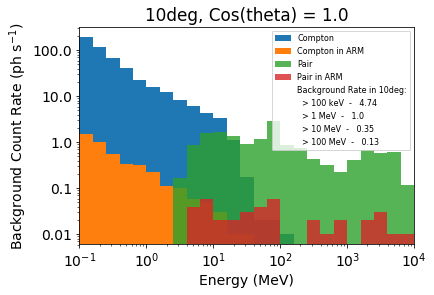

In [3]:
hist_CompARM,hist_PairARM=ScienceSims.plot_AMEGO_background_sim(dir='../Simulations/BackgroundFiles/Sims_100s/',data=data,ARMcut=10,angleSelection=1.0)

In [21]:
for e,r in zip(hist_CompARM[0], hist_CompARM[1]):
    print '%.3f %.3f' % (e, r)

0.010 0.000
0.016 0.000
0.025 0.000
0.040 0.000
0.063 1.288
0.100 17.613
0.158 25.817
0.251 10.895
0.398 3.880
0.631 1.417
1.000 0.867
1.585 0.393
2.512 0.119
3.981 0.068
6.310 0.026
10.000 0.014
15.849 0.005
25.119 0.001
39.811 0.001
63.096 0.000
100.000 0.000
158.489 0.000
251.189 0.000
398.107 0.000
630.957 0.000
1000.000 0.000
1584.893 0.000
2511.886 0.000
3981.072 0.000
6309.573 0.000
10000.000 0.000
15848.932 0.000
25118.864 0.000
39810.717 0.000
63095.734 0.000


## Produce background data file
Now we process the background in the Compton channel and create the data file read by GPST.

First off, some parameters (which must match the GPST detector configuration file):

In [29]:
# Energy range and binning
emin = 100 #keV
emax = 10000 #keV
delta_e = 1 #keV

# Resulting number of energy bins
n_ebins = (emax - emin)/delta_e + 1

Next, rearrange the background data into a more convenient format.

**Note:** The table returned by ``plot_AMEGO_background_sim`` contains ph s<sup>-1</sup> MeV<sup>-1</sup>, even though the plot is ph s<sup>-1</sup>. We need the latter.

In [22]:
background_data = []
for i in range(1, len(hist_CompARM[0])):
    e1 = hist_CompARM[0][i-1]
    e2 = hist_CompARM[0][i]
    if e1 > emax*1e-3:
        break
    
    de = (e2-e1)
    
    rate = de*hist_CompARM[1][i]
    rate = max(1e-9, rate)  # Can't interpolate on a log scale if rate is 0
    
    background_data.append((e1, e2, rate))

Now we can finally produce the table:

In [30]:
background = np.zeros(n_ebins)
current_bin = 0
slope = None
scale = None
for bin, energy in enumerate(np.arange(emin, emax + .1*delta_e, delta_e)):
    # find bin
    last_bin = current_bin
    while current_bin < len(background_data) and background_data[current_bin][1] < 1e-3*energy:
        current_bin += 1

    # recalculate slope and scale of power-law fit if needed
    if last_bin != current_bin or slope is None:
        slope = 0.
        cslope = 0.
        x = 0.5 * (background_data[current_bin][0] + background_data[current_bin][1])
        y = background_data[current_bin][2]
        if current_bin > 0:
            x2 = 0.5 * (background_data[current_bin-1][0] + background_data[current_bin-1][1])
            y2 = background_data[current_bin-1][2]
            slope += math.log(y/y2) / math.log(x/x2)
            cslope +=1
        if current_bin < len(background_data) - 1:
            x2 = 0.5 * (background_data[current_bin+1][0] + background_data[current_bin+1][1])
            y2 = background_data[current_bin+1][2]
            slope += math.log(y2/y) / math.log(x2/x)
            cslope +=1
        slope /= cslope
        scale = y * (1+slope)/(background_data[current_bin][1]**(1+slope) - background_data[current_bin][0]**(1+slope))
        #print 'lx : %g    ly : %g    Slope : %g     Scale : %g' % (x, y, slope, scale)

    # calculate number of events in [E, E + Delta E]
    rate = 0.
    e1 = energy*1e-3
    e2 = (energy + delta_e)*1e-3
    if slope == -1:
        rate = scale * math.log(e2/e1)
    else:
        rate = scale/(slope+1) * (e2**(slope+1) - e1**(slope+1))

    #print '%.2f %.2f %g' % (energy, energy + delta_e, rate)
    background[bin] = rate

If you want to store the background in a file, uncomment the last line, adjust file name as needed:

In [32]:
def write_background_file(filename):
    of = open(filename, 'w')
    for r in background:
        of.write('%g ' % r)
        
# write_background_file('background.AMEGO.txt')